Saving g.png to g (1).png


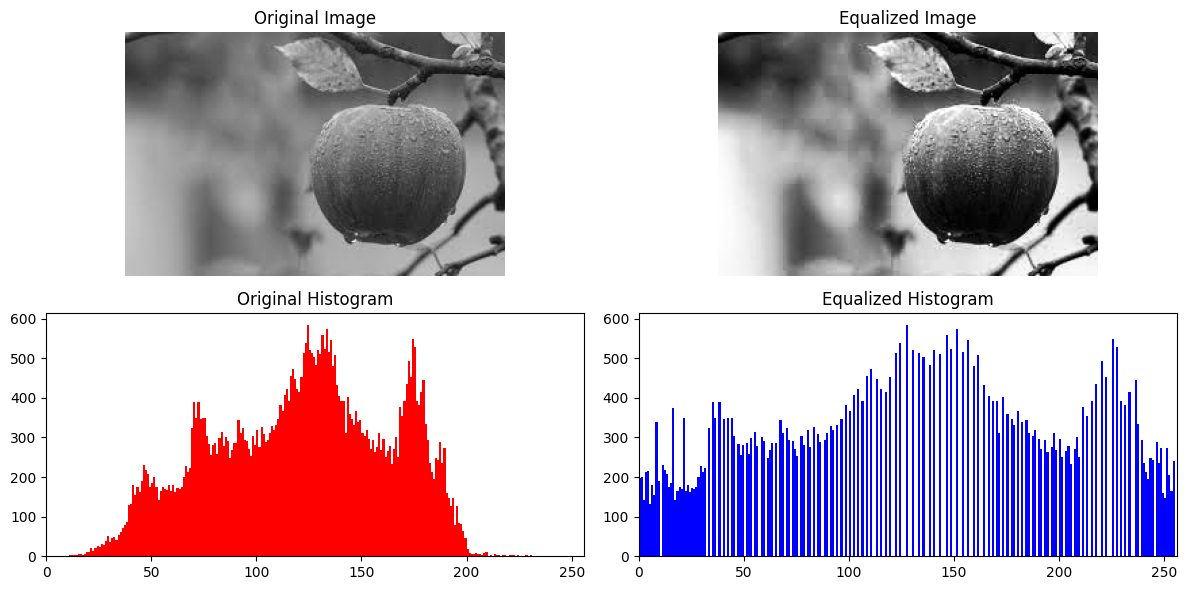

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def histogram_equalization(image):



    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))


    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]


    scaled_cdf = np.floor(cdf_normalized * 255).astype(np.uint8)


    def histogram_mapping(image, scaled_cdf):
        equalized_img = np.zeros_like(image, dtype=np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                equalized_img[i, j] = scaled_cdf[image[i, j]]
        return equalized_img

    equalized_image = histogram_mapping(image, scaled_cdf)


    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.hist(image.flatten(), 256, [0, 256], color='r')
    plt.title('Original Histogram')
    plt.xlim([0, 256])

    plt.subplot(2, 2, 4)
    plt.hist(equalized_image.flatten(), 256, [0, 256], color='b')
    plt.title('Equalized Histogram')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

    return equalized_image

def upload_image():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
        return image
    else:
        print("No files were uploaded.")
        return None

def main():
    image = upload_image()
    if image is not None:
        equalized_image = histogram_equalization(image)

if __name__ == "__main__":
    main()
